# 10botics Web Scrape Template (Student Version)
Billy Hau - June 12, 2012

- 1) Take a look at the website and locate target data
- 2) Use Chrome developer tool to identify data structure (Single Entry or Table)
- 3) List out steps to get to target data
- 4) Use Selenium and XPath to extract data
- 5) Put data into Pandas

<br>
<b>Tip #1:</b> Try out action one at a time at first to make sure it work, then put it in loop!
<br>
<br>
<b>Tip #2:</b> If button is not clickable for some reason, try using ActionChain like following:

            button = driver.find_element(By.XPATH, "//button")

            action = ActionChains(driver)
            action.move_to_element(button).click().perform()


  If the element you are trying to click is out of view, you can brute force keep trying until it is in view...

    
        while True:
            try:
                button.click()
                break
            except:
                time.sleep(0.5)
<br>
<b>Tip #3:</b> Sometimes things is magically work by adding a longer delay or sleep in between actions!
<br>
<br>
<b>Tip #4:</b> If you don't know how to do something, try searching on Google!
<br>
<br>

In [1]:
%pip install selenium
%pip install matplotlib
%pip install webdriver_manager

discover_other_daemon: 1Requirement already satisfied: selenium in /home/wcyat/dev/kaggle/code/venv/lib/python3.10/site-packages (4.2.0)
You should consider upgrading via the '/home/wcyat/dev/kaggle/code/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
discover_other_daemon: 1Requirement already satisfied: matplotlib in /home/wcyat/dev/kaggle/code/venv/lib/python3.10/site-packages (3.5.2)
You should consider upgrading via the '/home/wcyat/dev/kaggle/code/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
discover_other_daemon: 1Requirement already satisfied: webdriver_manager in /home/wcyat/dev/kaggle/code/venv/lib/python3.10/site-packages (3.7.0)
You should consider upgrading via the '/home/wcyat/dev/kaggle/code/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Import Libraries
# The Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Selenium Libraries
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

# Other Libraries
import glob
import os
from PIL import Image
import re
import requests
import shutil
import time

In [3]:
## Download Helper Function
def download(url, folder='', filename=''):

    _filename = url.split('/')[-1]
    _ext = _filename.split('.')[-1]

    if filename != '':
        _filename = f'{filename}.{_ext}'

    _path = _filename

    if folder != '':
       
        if not os.path.exists(folder):
            os.mkdir(folder)
        
        _path = f'{folder}/{_filename}'
    
    response = requests.get(url)
    file = open(_path, "wb")
    file.write(response.content)
    file.close()

In [4]:
## Start Selenium Chrome Browser

# Set Fake User Agent to pretend to be Human
options = Options()
userAgent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'
options.add_argument(f'user-agent={userAgent}')

# Launch Browswer
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), chrome_options=options)

[WDM] - ====== WebDriver manager ======
[WDM] - Could not get version for google-chrome. Is google-chrome installed?
[WDM] - Get LATEST chromedriver version for None google-chrome
[WDM] - Driver [/home/wcyat/.wdm/drivers/chromedriver/linux64/102.0.5005.61/chromedriver] found in cache
/tmp/ipykernel_121945/3896311262.py:9: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), chrome_options=options)


# Example Project
Delete followings if starting a new project!

In [5]:
# Load Website... make sure to look at the html source to make sense of the XPath!
url = 'http://www.google.com/'
driver.get(url)
time.sleep(2)

In [6]:
# Let's search for 10botics on Google
xpath_searchBar = "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input"
driver.find_element(By.XPATH, xpath_searchBar).send_keys('10botics') # Send '10botics' to the search bar
driver.find_element(By.XPATH, xpath_searchBar).send_keys(Keys.ENTER) # Send Enter key to the search bar
driver.save_screenshot('10botics_search.png') # Save a screenshot of the search results
time.sleep(5)

In [7]:
# Let's Try Scraping a Book Store
url = 'http://books.toscrape.com/'
driver.get(url)

In [8]:
# Get the Website Name
xpath_siteName = "____________<PUT XPATH HERE>____________"
siteName = driver.find_element(By.XPATH, xpath_siteName).text
siteName

InvalidSelectorException: Message: invalid selector: Unable to locate an element with the xpath expression ____________<PUT XPATH HERE>____________ because of the following error:
SyntaxError: Failed to execute 'evaluate' on 'Document': The string '____________<PUT XPATH HERE>____________' is not a valid XPath expression.
  (Session info: chrome=102.0.5005.115)
Stacktrace:
#0 0x557683174f33 <unknown>
#1 0x557682ebf118 <unknown>
#2 0x557682ec1f97 <unknown>
#3 0x557682ec1e3b <unknown>
#4 0x557682ec20fc <unknown>
#5 0x557682ef511e <unknown>
#6 0x557682ef55c1 <unknown>
#7 0x557682f285c4 <unknown>
#8 0x557682f12f9d <unknown>
#9 0x557682f262e4 <unknown>
#10 0x557682f12e63 <unknown>
#11 0x557682ee882a <unknown>
#12 0x557682ee9985 <unknown>
#13 0x5576831b94cd <unknown>
#14 0x5576831bd5ec <unknown>
#15 0x5576831a371e <unknown>
#16 0x5576831be238 <unknown>
#17 0x557683198870 <unknown>
#18 0x5576831da608 <unknown>
#19 0x5576831da788 <unknown>
#20 0x5576831f4f1d <unknown>
#21 0x7ffb5368c54d <unknown>


In [ ]:
# Click the Next Button till Page 3
xpath_nextButton = "____________<PUT XPATH HERE>____________"
xpath_currentPage = "____________<PUT XPATH HERE>____________"

while int(driver.find_element(By.XPATH, xpath_currentPage).text.split(' ')[1]) < 3:
    driver.find_element(By.XPATH, xpath_nextButton).click()


In [ ]:
# Get List of Book Elements
xpath_items = "____________<PUT XPATH HERE>____________"
items = driver.find_elements(By.XPATH, xpath_items)

In [ ]:
# Iterate through the item list and extract Data from each book element
name_list = []
price_list = []
rating_list = []
img_list = []

dict_rating = {'One' : 1, 'Two' : 2, 'Three' : 3, 'Four': 4, 'Five':5}

for book in items:
    name = book.find_element(By.XPATH, "____________<PUT XPATH HERE>____________").get_attribute('title') # Extract book title from title attribute
    price = book.find_element(By.XPATH, "____________<PUT XPATH HERE>____________").text.replace('£','') # Extract price from text field

    rating = book.find_element(By.XPATH, "____________<PUT XPATH HERE>____________").get_attribute('class').split(' ')[1] # Extract rating from class attribute
    rating = dict_rating[rating] # Map rating from text to numeric

    img_url = book.find_element(By.XPATH, "____________<PUT XPATH HERE>____________").get_attribute('src') # Extract image url from src attribute

    name_list.append(name)
    price_list.append(price)
    rating_list.append(rating)
    img_list.append(img_url)


In [ ]:
# Put Data in a Pandas DataFrame and Export CSV File
df = pd.DataFrame()
df['title'] = name_list
df['price'] = pd.to_numeric(price_list)
df['rating'] = rating_list
df['image_url'] = img_list
df.to_csv('book_list.csv', index=False)
df

,title,price,rating,image_url
0,Modern Romance,28.26,5,http://books.toscrape.com/media/cache/28/78/28...
1,Miss Peregrine’s Home for Peculiar Children (M...,10.76,1,http://books.toscrape.com/media/cache/01/26/01...
2,Louisa: The Extraordinary Life of Mrs. Adams,16.85,2,http://books.toscrape.com/media/cache/6f/d9/6f...
3,Little Red,13.47,3,http://books.toscrape.com/media/cache/80/25/80...
4,Library of Souls (Miss Peregrine’s Peculiar Ch...,48.56,5,http://books.toscrape.com/media/cache/f8/54/f8...
5,Large Print Heart of the Pride,19.15,2,http://books.toscrape.com/media/cache/bd/e9/bd...
6,I Had a Nice Time And Other Lies...: How to fi...,57.36,4,http://books.toscrape.com/media/cache/5f/72/5f...
7,Hollow City (Miss Peregrine’s Peculiar Childre...,42.98,1,http://books.toscrape.com/media/cache/e2/60/e2...
8,Grumbles,22.16,2,http://books.toscrape.com/media/cache/d6/1b/d6...
9,Full Moon over Noah’s Ark: An Odyssey to Mount...,49.43,4,http://books.toscrape.com/media/cache/57/77/57...


Text(0, 0.5, 'Frequency')

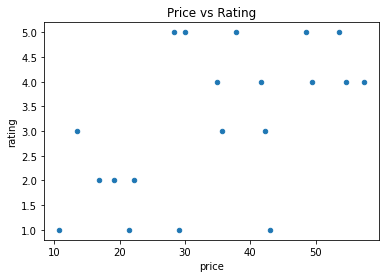

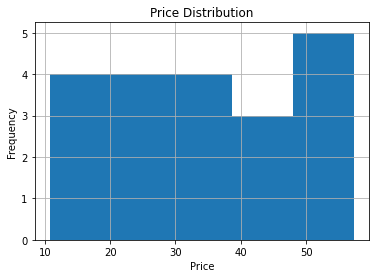

In [ ]:
# Let's Visualize Some Data
df.plot.scatter(x='price', y='rating', title='Price vs Rating')

df.hist(column=['price'], bins=5)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [ ]:
# Download All the Book Images
def download_book(row):
    title = re.sub('[^A-Za-z0-9]+', '', row.title) # Remove Characters that are not A to Z or Numeric
    download(row.image_url, 'book_img', title)
    return Image.open(f'book_img/{title}.jpg')

book_images = df.apply(download_book, axis='columns')

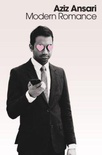

Modern Romance
£28.26
---------------------


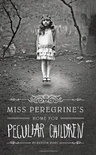

Miss Peregrine’s Home for Peculiar Children (Miss Peregrine’s Peculiar Children #1)
£10.76
---------------------


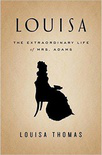

Louisa: The Extraordinary Life of Mrs. Adams
£16.85
---------------------


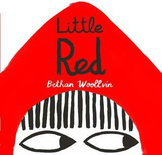

Little Red
£13.47
---------------------


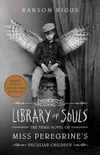

Library of Souls (Miss Peregrine’s Peculiar Children #3)
£48.56
---------------------


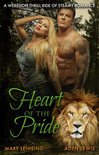

Large Print Heart of the Pride
£19.15
---------------------


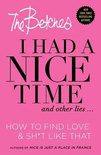

I Had a Nice Time And Other Lies...: How to find love & sh*t like that
£57.36
---------------------


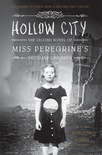

Hollow City (Miss Peregrine’s Peculiar Children #2)
£42.98
---------------------


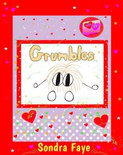

Grumbles
£22.16
---------------------


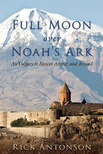

Full Moon over Noah’s Ark: An Odyssey to Mount Ararat and Beyond
£49.43
---------------------


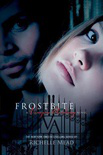

Frostbite (Vampire Academy #2)
£29.99
---------------------


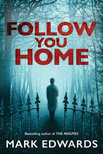

Follow You Home
£21.36
---------------------


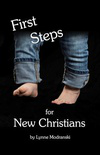

First Steps for New Christians (Print Edition)
£29.00
---------------------


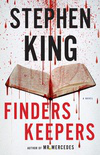

Finders Keepers (Bill Hodges Trilogy #2)
£53.53
---------------------


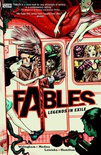

Fables, Vol. 1: Legends in Exile (Fables #1)
£41.62
---------------------


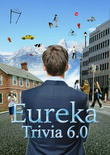

Eureka Trivia 6.0
£54.59
---------------------


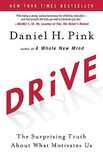

Drive: The Surprising Truth About What Motivates Us
£34.95
---------------------


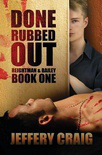

Done Rubbed Out (Reightman & Bailey #1)
£37.72
---------------------


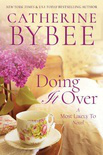

Doing It Over (Most Likely To #1)
£35.61
---------------------


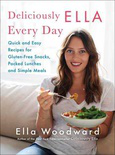

Deliciously Ella Every Day: Quick and Easy Recipes for Gluten-Free Snacks, Packed Lunches, and Simple Meals
£42.16
---------------------


In [ ]:
# Display Scraped Book Data
for i in range(len(book_images)):
    display(book_images[i])
    print(df.iloc[i,0]) # Print Column 1
    print(df.iloc[i,1]) # Print Column 2
    print('---------------------')